<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/clustering_and_classification/EnsembleClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ensemble Classification**

"Traditionally, we have modeled our data with a single algorithm. That might be a Logistic Regression, Gaussian Naive Bayes, or XGBoost."  An ensemble method is "an algorithm that is used to combine the base estimators is called the meta learner. We can determine how we want this algorithm to respond to different predictions from other models(classifiers in this case)." [2]  Also referred to as a "meta learner." [2]

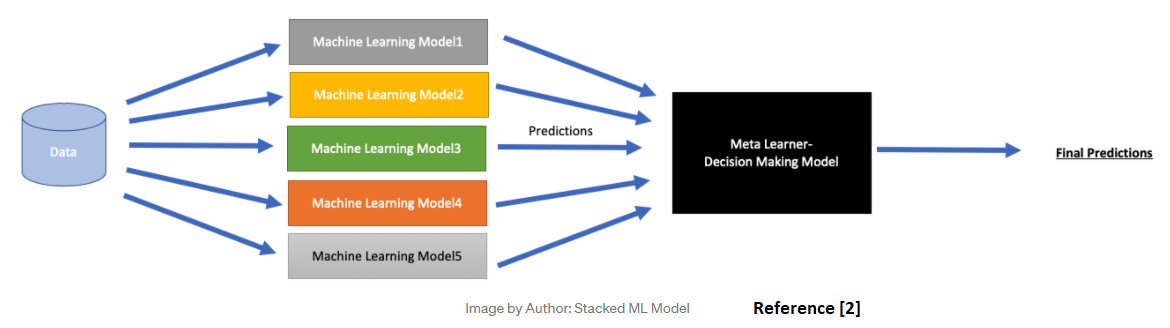

**Ensembles:**
*   Combine predictions from multiple models generated from training data [3]
*   May be of the same class (i.e. trees) or different [3]
*   Empirical studies show predictions from combinations of models often perform better. “Wisdom of crowds” [3]

**Pros:**
1.  "Crowd sourcing is better; diversity should be leveraged. We should choose the best model from a collection of choices. An ensemble can create lower variance and lower bias. Also, an ensemble creates a deeper understanding of the data. Underlying data patterns are hidden. Ensembles should be used for more accuracy." [4]
2.  "Generally, ensembles have higher predictive accuracy. Test results improve with the size of the ensemble. That is why, ensembles are often challenge winners. Each technique has its own characteristics. For example, in data wrangling and tuning options. Tweaking makes models fit better." [4]

**Cons:**
1.  "Model ensembles are not always better. New observations can still confuse. That is, ensembles cannot help unknown differences between sample and population. Ensembles should be used carefully." [4]

2.  "Is it understood? Ensembles can be more difficult to interpret. Sometimes, even the very best ideas cannot be sold to decision makers. Sometimes, the best ideas are not accepted by the final users." [4]

3.  "Finally, ensembles cost more to create, train, and deploy. The ROI of an ensemble approach should be considered carefully. Generally, more complexity is not good in of itself. KISS. We have found that a full one-third of IS systems failure is due to complexity." [4]


**References**


1.   https://www.sktime.org/en/latest/examples/03_classification_multivariate.html
2.   https://towardsdatascience.com/ensemble-models-for-classification-d443ebed7efe
3.  https://www.soa.org/globalassets/assets/files/e-business/pd/events/2020/predictive-analytics-4-0/pd-2020-09-pas-session-014.pdf
4.  https://blogs.perficient.com/2019/11/07/predictive-model-ensembles-pros-and-cons/





In [ ]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3 MB 1.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!pip install sktime

     |████████████████████████████████| 5.8 MB 7.2 MB/s 
     |████████████████████████████████| 9.5 MB 38.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator


In [ ]:
X, y = load_basic_motions(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train.head()

(60, 6) (60,) (20, 6) (20,)


,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5
9,0 -0.407421 1 -0.407421 2 2.355158 3...,0 1.413374 1 1.413374 2 -3.928032 3...,0 0.092782 1 0.092782 2 -0.211622 3...,0 -0.066584 1 -0.066584 2 -3.630177 3...,0 0.223723 1 0.223723 2 -0.026634 3...,0 0.135832 1 0.135832 2 -1.946925 3...
24,0 0.383922 1 0.383922 2 -0.272575 3...,0 0.302612 1 0.302612 2 -1.381236 3...,0 -0.398075 1 -0.398075 2 -0.681258 3...,0 0.071911 1 0.071911 2 -0.761725 3...,0 0.175783 1 0.175783 2 -0.114525 3...,0 -0.087891 1 -0.087891 2 -0.503377 3...
5,0 -0.357300 1 -0.357300 2 -0.005055 3...,0 -0.584885 1 -0.584885 2 0.295037 3...,0 -0.792751 1 -0.792751 2 0.213664 3...,0 0.074574 1 0.074574 2 -0.157139 3...,0 0.159802 1 0.159802 2 -0.306288 3...,0 0.023970 1 0.023970 2 1.230478 3...
7,0 -0.352746 1 -0.352746 2 -1.354561 3...,0 0.316845 1 0.316845 2 0.490525 3...,0 -0.473779 1 -0.473779 2 1.454261 3...,0 -0.327595 1 -0.327595 2 -0.269001 3...,0 0.106535 1 0.106535 2 0.021307 3...,0 0.197090 1 0.197090 2 0.460763 3...
34,0 0.052231 1 0.052231 2 -0.54804...,0 -0.730486 1 -0.730486 2 0.70700...,0 -0.518104 1 -0.518104 2 -1.179430 3...,0 -0.159802 1 -0.159802 2 -0.239704 3...,0 -0.045277 1 -0.045277 2 0.023970 3...,0 -0.029297 1 -0.029297 2 0.29829...


In [ ]:
# multi-class target variable
np.unique(y_train)

array(['badminton', 'running', 'standing', 'walking'], dtype=object)

In [ ]:
from sktime.classification.compose import ColumnEnsembleClassifier

clf = ColumnEnsembleClassifier(estimators=[
    ("TSF0", TimeSeriesForestClassifier(n_estimators=100), [0]),
    ("BOSSEnsemble3", BOSSEnsemble(max_ensemble_size=5), [3]),
])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95